In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "C:/Users/Jenni/UNCCDABC/Homeworks/matplotlib-challenge/Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/Jenni/UNCCDABC/Homeworks/matplotlib-challenge/Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_drug_trial_df = pd.merge(clinical_trial_df, mouse_drug_df,
                                 on="Mouse ID", how="outer")
                                  
# Display the data table for preview
combined_drug_trial_df.head()                                  

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Create a dataframe without the Metastatic Sites column.
# It's not needed here.
drug_trial_df = pd.DataFrame({"Drug": combined_drug_trial_df["Drug"],
                                    "Timepoint": combined_drug_trial_df["Timepoint"],
                                    "Tumor Volume (mm3)": combined_drug_trial_df["Tumor Volume (mm3)"]})

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
drug_trial_groups = drug_trial_df.groupby(["Drug", "Timepoint"]).mean()


# Convert to DataFrame
tumor_response_df = pd.DataFrame(drug_trial_groups.reset_index())

# Rename Tumor Volume (mm3) to Avg. Tumor Volume (mm3)
tumor_response_df.columns = ["Drug", "Timepoint", "Avg. Tumor Volume (mm3)"]

# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Avg. Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume = drug_trial_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
drug_tumor_response_df = pd.DataFrame(sem_tumor_volume)
drug_tumor_response_df.reset_index(inplace=True)

# Rename column Tumor Volume (mm3) to SEM Tumor Volume
drug_tumor_response_df.columns = ["Drug", "Timepoint", "SEM Tumor Volume"]

# Preview DataFrame
drug_tumor_response_df.head()

,Drug,Timepoint,SEM Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_response_df = tumor_response_df.pivot(index='Timepoint',columns='Drug',values='Avg. Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_tumor_response_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


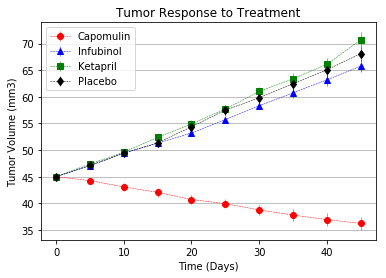

In [5]:
# Generate the Plot (with Error Bars)
drug_list = [('Capomulin','o','red'),('Infubinol','^','blue'),
                    ('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_list:
    ste = sem_tumor_volume[drug]
    tumor_response_plt = plt.errorbar(pivot_tumor_response_df.index,pivot_tumor_response_df[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(axis='y')

# Save the Figure
plt.savefig("C:/Users/Jenni/UNCCDABC/Homeworks/matplotlib-challenge/Pymaceuticals/Images/TumorResponseToTreatment.jpeg")

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_groups = combined_drug_trial_df.groupby(['Drug','Timepoint'])['Metastatic Sites']
metastatic_sites_means = metastatic_groups.mean()

# Convert to DataFrame
metastatic_sites_means = metastatic_sites_means.reset_index()

# Preview DataFrame
metastatic_sites_means.head()

# Rename Tumor Volume (mm3) to Avg. Tumor Volume (mm3)
#tumor_response_df.columns = ["Drug", "Timepoint", "Avg. Tumor Volume (mm3)"]

# Preview DataFrame
#tumor_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic_sites = metastatic_groups.sem()

# Convert to DataFrame
sem_metastatic_sites_df = pd.DataFrame(sem_metastatic_sites)

# Preview DataFrame
sem_metastatic_sites_df.reset_index()
sem_metastatic_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
pivot_metastatic_sites_means_df = metastatic_sites_means.pivot(index='Timepoint', 
                                                  columns='Drug', values="Metastatic Sites")

# Preview that Reformatting worked
pivot_metastatic_sites_means_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


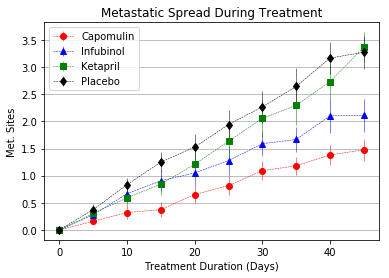

In [10]:
# Generate the Plot (with Error Bars)
for drug,marker,colors in drug_list:
    ste = sem_metastatic_sites[drug]
    metastatic_spread_plt = plt.errorbar(pivot_metastatic_sites_means_df.index,pivot_metastatic_sites_means_df[drug],ste,
                                       fmt=marker,ls='--',color=colors,linewidth=0.5)
    
plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(axis='y')

# Save the Figure
plt.savefig("C:/Users/Jenni/UNCCDABC/Homeworks/matplotlib-challenge/Pymaceuticals/Images/MetastaticSpread.jpeg")

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_groups_df = combined_drug_trial_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
count_mouse_df = mouse_groups_df.nunique()

# Convert to DataFrame
count_mouse_df = pd.DataFrame(count_mouse_df)
count_mouse_df.reset_index(inplace=True)
count_mouse_df = count_mouse_df.rename(columns={'Mouse ID':'Mouse Count'})

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot_count_mouse_df = count_mouse_df.pivot(index='Timepoint', columns='Drug',
                                           values='Mouse Count')

# Preview the Data Frame
pivot_count_mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


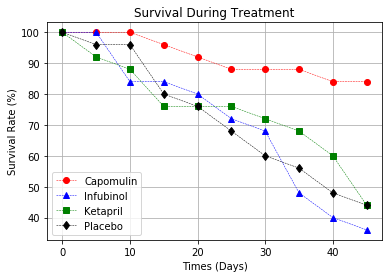

In [13]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_list:
    total_mouse = pivot_count_mouse_df[drug][0]
    survival_pct = (pivot_count_mouse_df[drug] / total_mouse) * 100
    survival_rates_plt = plt.errorbar(pivot_count_mouse_df.index,survival_pct,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

# Save the Figure
plt.savefig("C:/Users/Jenni/UNCCDABC/Homeworks/matplotlib-challenge/Pymaceuticals/Images/SurvivalDuringTreatment.jpeg")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percentage_change = ((pivot_tumor_response_df.iloc[-1] / pivot_tumor_response_df.iloc[0]) - 1) * 100

# Display the data to confirm
percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [15]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs
passing = percentage_change < 0

# Orient widths. Add labels, tick marks, etc. 

# Use functions to label the percentages of changes

# Call functions to implement the function calls

# Save the Figure

# Show the Figure
